# Structure function

In [27]:
from importlib import reload
import numpy as np

from cugn import arcteryx
from oceancolor.utils import plotting

from matplotlib import pyplot as plt
import seaborn as sns

In [24]:
%matplotlib ipympl

# Load

In [43]:
reload(arcteryx)
adict = arcteryx.load_ctd()

# Cut on time

In [107]:
reload(arcteryx)
dt, idx = arcteryx.cut_on_time(5., adict=adict)

# Separation (and r)

In [108]:
reload(arcteryx)
rdict = arcteryx.calc_r(adict, idx)

# Velocity 

In [121]:
reload(arcteryx)
udict = arcteryx.calc_du(adict, rdict, idx, iz=1)

# Structure function

In [122]:
S3 = udict['duL']**3

In [123]:
gd = np.isfinite(S3)

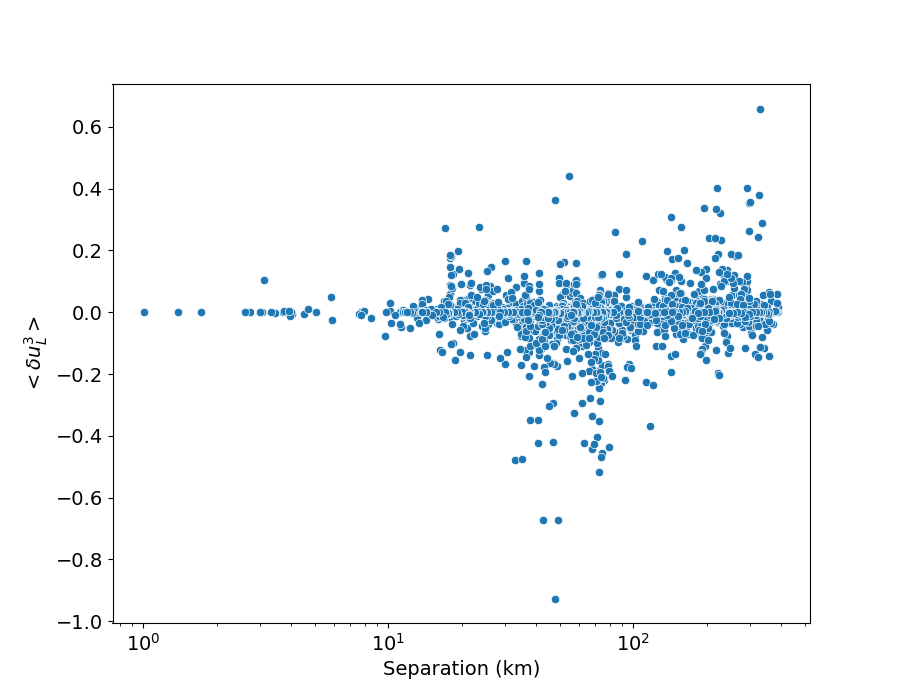

In [124]:
fig = plt.figure(figsize=(9,7))
ax = sns.scatterplot(x=rdict['r'][gd], y=S3[gd])
ax.set_xscale('log')
ax.set_xlabel('Separation (km)')
ax.set_ylabel(r'$<\delta u_L^3>$')
#
plotting.set_fontsize(ax, 14)
plt.show()

## Bin up

In [125]:
nbins = 15
rbins = 10**np.linspace(0., np.log10(400),nbins)
rbins

array([  1.        ,   1.5341274 ,   2.35354689,   3.61064079,
         5.53918298,   8.49781241,  13.0367269 ,  20.        ,
        30.68254809,  47.07093787,  72.21281575, 110.78365961,
       169.9562482 , 260.73453795, 400.        ])

In [126]:
avg_S3 = []
err_avgS3 = []
std_S3 = []
avg_r = []
for ss in range(nbins-1):
    in_r = (rdict['r'] > rbins[ss]) & (rdict['r'] <= rbins[ss+1])
    #
    avg_r.append(np.nanmean(rdict['r'][in_r]))
    avg_S3.append(np.nanmean(S3[in_r])) 
    std_S3.append(np.nanstd(S3[in_r])) 
    err_avgS3.append(np.nanstd(S3[in_r])/np.sqrt(np.sum(np.isfinite(S3[in_r])))) 

In [127]:
avg_S3

[-0.0001439114137781249,
 -3.367818949039616e-06,
 0.015055911318798207,
 -0.00017505962683059747,
 0.0023394399516571004,
 -0.007014660059900085,
 0.008610470331359168,
 0.0034049153023858253,
 -0.020815098936750997,
 -0.017027929132913226,
 -0.017970124970937026,
 0.003553139671916034,
 0.0070495757893541885,
 0.014233332499831006]

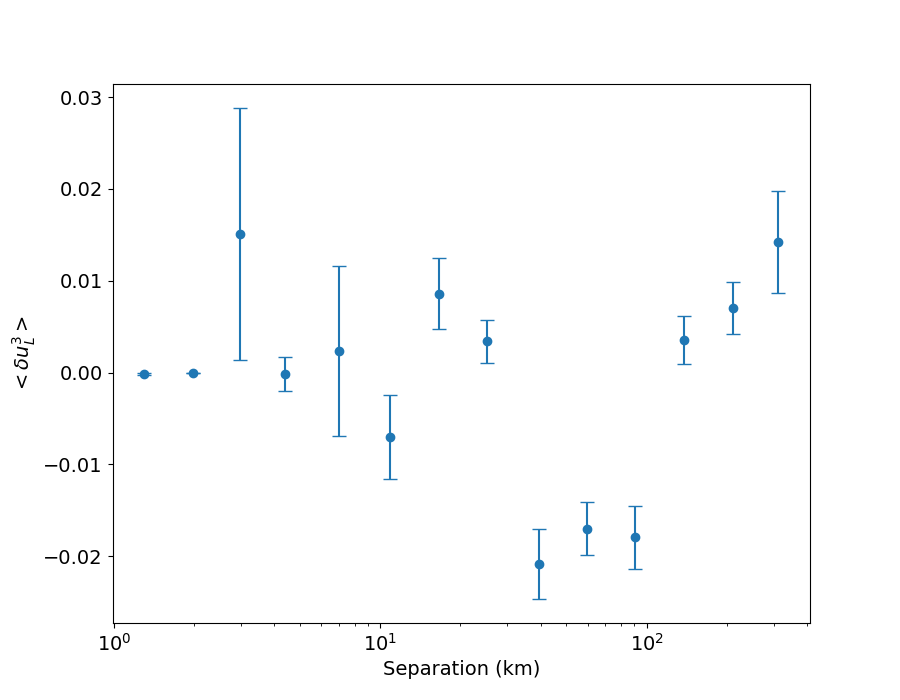

In [128]:
fig = plt.figure(figsize=(9,7))
ax = plt.gca()
ax.errorbar(avg_r, avg_S3, yerr=err_avgS3, fmt='o', capsize=5)  # fmt defines marker style, capsize sets error bar cap length
#sns.scatterplot(x=avg_r, y=avg_S3)

ax.set_xscale('log')
#
ax.set_xlabel('Separation (km)')
ax.set_ylabel(r'$<\delta u_L^3>$')
plotting.set_fontsize(ax, 14.)
plt.show()

In [129]:
0.02**(0.333)

0.2717959546832586

----

# Checks

## Time

In [40]:
t0 = adict['time'][idx[0][0]]
t1 = adict['time'][idx[1][0]]
(t1-t0)/3600

-0.5149999998675452

## Separation

In [41]:
d0 = adict['dist'][idx[0][0]]
d1 = adict['dist'][idx[1][0]]
d1-d0

-1.9344027105855797

In [42]:
o0 = adict['offset'][idx[0][0]]
o1 = adict['offset'][idx[1][0]]
o1-o0

-10.011078600000088

## Mission ID

In [47]:
m0 = adict['missid'][idx[0][0]]
m1 = adict['missid'][idx[1][0]]
m0, m1

(1, 2)